## 2. Preprocessing and Performance: Detecting ExoPlanets

**Objective**: Utilize data from the **K2 Kepler mission** (which concluded in 2018) to develop a machine learning model that assists in classifying celestial bodies and determining their exoplanet status. An exoplanet is defined as "A planet that orbits a star outside the solar system".

**Background**: The Kepler Mission was strategically devised to survey a segment of the Milky Way galaxy. Its primary goal was to identify Earth-sized or smaller planets situated in or near the habitable zone. This would further help in estimating the fraction of stars in our galaxy that might host such planets (_Nasa.gov, 2018_). The assignment itself is based almost completely on a previous student project from MAL 2022 submitted by Pavel Balan and Alex Vasilianov.

**Data Source**: The dataset is provided by the NASA Exoplanet Archive, NASA Exoplanet Science Institute [here](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=koi). There are several datasets available, all from differet periods, but we will use the __Cumulative KOI Data__ dataset.

The cumulative KOI (Kepler Objects of interest) table gathers information from the individual KOI activity tables that describe the current results of different searches of the Kepler light curves. The intent of the cumulative table is to provide the most accurate dispositions and stellar and planetary information for all KOIs in one place. All the information in this table has provenance in other KOI activity tables (_exoplanetarchive.ipac.caltech.edu, 2018_).

The data has been locally downloaded and saved as `exoplanet_dataset.csv`.


#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, or other anomalies.
3. Choose appropriate machine learning algorithms for the classification task.
4. Train and validate your model, ensuring to avoid overfitting.
5. Evaluate the model's performance using relevant metrics.

Below some guidelines are given but the assignment is relatively "free".

Best of luck with your analysis!


### 1. Explore

In [342]:
# Loading the data (change this if you want other var-names, etc.)
import pandas as pd

exoplanet_df = pd.read_csv('exoplanet_dataset.csv')

print(exoplanet_df.shape, "- 9564 rows with 49 features")

pd.set_option('display.max_columns', None)
exoplanet_df.head()

(9564, 49) - 9564 rows with 49 features


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


**COLUMN NAME | COLUMN DESCRIPTION [Data measurement unit type]**

COLUMN kepid:          KepID <br/>
COLUMN kepoi_name:     KOI Name <br/>
COLUMN kepler_name:    Kepler Name <br/>
COLUMN koi_disposition: Exoplanet Archive Disposition <br/>
COLUMN koi_pdisposition: Disposition Using Kepler Data <br/>
COLUMN koi_score:      Disposition Score <br/>
COLUMN koi_fpflag_nt:  Not Transit-Like False Positive Flag <br/>
COLUMN koi_fpflag_ss:  Stellar Eclipse False Positive Flag <br/>
COLUMN koi_fpflag_co:  Centroid Offset False Positive Flag <br/>
COLUMN koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag <br/>
COLUMN koi_period:     Orbital Period [days] <br/>
COLUMN koi_period_err1: Orbital Period Upper Unc. [days] <br/>
COLUMN koi_period_err2: Orbital Period Lower Unc. [days] <br/>
COLUMN koi_time0bk:    Transit Epoch [BKJD] <br/>
COLUMN koi_time0bk_err1: Transit Epoch Upper Unc. [BKJD] <br/>
COLUMN koi_time0bk_err2: Transit Epoch Lower Unc. [BKJD] <br/>
COLUMN koi_impact:     Impact Parameter <br/>
COLUMN koi_impact_err1: Impact Parameter Upper Unc. <br/>
COLUMN koi_impact_err2: Impact Parameter Lower Unc. <br/>
COLUMN koi_duration:   Transit Duration [hrs] <br/>
COLUMN koi_duration_err1: Transit Duration Upper Unc. [hrs] <br/>
COLUMN koi_duration_err2: Transit Duration Lower Unc. [hrs] <br/>
COLUMN koi_depth:      Transit Depth [ppm] <br/>
COLUMN koi_depth_err1: Transit Depth Upper Unc. [ppm] <br/>
COLUMN koi_depth_err2: Transit Depth Lower Unc. [ppm] <br/>
COLUMN koi_prad:       Planetary Radius [Earth radii] <br/>
COLUMN koi_prad_err1:  Planetary Radius Upper Unc. [Earth radii] <br/>
COLUMN koi_prad_err2:  Planetary Radius Lower Unc. [Earth radii] <br/>
COLUMN koi_teq:        Equilibrium Temperature [K] <br/>
COLUMN koi_teq_err1:   Equilibrium Temperature Upper Unc. [K] <br/>
COLUMN koi_teq_err2:   Equilibrium Temperature Lower Unc. [K] <br/>
COLUMN koi_insol:      Insolation Flux [Earth flux] <br/>
COLUMN koi_insol_err1: Insolation Flux Upper Unc. [Earth flux] <br/>
COLUMN koi_insol_err2: Insolation Flux Lower Unc. [Earth flux] <br/>
COLUMN koi_model_snr:  Transit Signal-to-Noise <br/>
COLUMN koi_tce_plnt_num: TCE Planet Number <br/>
COLUMN koi_tce_delivname: TCE Delivery <br/>
COLUMN koi_steff:      Stellar Effective Temperature [K] <br/>
COLUMN koi_steff_err1: Stellar Effective Temperature Upper Unc. [K] <br/>
COLUMN koi_steff_err2: Stellar Effective Temperature Lower Unc. [K] <br/>
COLUMN koi_slogg:      Stellar Surface Gravity [log10(cm/s^2)] <br/>
COLUMN koi_slogg_err1: Stellar Surface Gravity Lower Unc. [log10(cm/s^2)] <br/>
COLUMN koi_slogg_err2: Stellar Surface Gravity Lower Unc. [log10(cm/s^2)] <br/>
COLUMN koi_srad:       Stellar Radius [Solar radii] <br/>
COLUMN koi_srad_err1:  Stellar Radius Upper Unc. [Solar radii] <br/>
COLUMN koi_srad_err2:  Stellar Radius Lower Unc. [Solar radii] <br/>
COLUMN ra:             RA [decimal degrees] <br/>
COLUMN dec:            Dec [decimal degrees] <br/>
COLUMN koi_kepmag:     Kepler-band [mag] <br/>

In [343]:
# For an easier comprehension, we will rename the columns into their description.

exoplanet_df = exoplanet_df.rename(columns={'kepid':'KepID',
'kepoi_name':'KOIName',
'kepler_name':'KeplerName',
'koi_disposition':'ExoplanetArchiveDisposition',
'koi_pdisposition':'DispositionUsingKeplerData',
'koi_score':'DispositionScore',
'koi_fpflag_nt':'NotTransit-LikeFalsePositiveFlag',
'koi_fpflag_ss':'koi_fpflag_ss',
'koi_fpflag_co':'CentroidOffsetFalsePositiveFlag',
'koi_fpflag_ec':'EphemerisMatchIndicatesContaminationFalsePositiveFlag',
'koi_period':'OrbitalPeriod, days',
'koi_period_err1':'OrbitalPeriodUpperUnc, days',
'koi_period_err2':'OrbitalPeriodLowerUnc, days',
'koi_time0bk':'TransitEpoch, BKJD',
'koi_time0bk_err1':'TransitEpochUpperUnc, BKJD',
'koi_time0bk_err2':'TransitEpochLowerUnc, BKJD',
'koi_impact':'ImpactParamete',
'koi_impact_err1':'ImpactParameterUpperUnc',
'koi_impact_err2':'ImpactParameterLowerUnc',
'koi_duration':'TransitDuration, hrs',
'koi_duration_err1':'TransitDurationUpperUnc, hrs',
'koi_duration_err2':'TransitDurationLowerUnc, hrs',
'koi_depth':'TransitDepth, ppm',
'koi_insol':'InsolationFlux, Earthflux',
'koi_insol_err1':'InsolationFluxUpperUnc, Earthflux',
'koi_insol_err2':'InsolationFluxLowerUnc, Earthflux',
'koi_model_snr':'TransitSignal-to-Noise',
'koi_tce_plnt_num':'TCEPlanetNumber',
'koi_tce_delivname':'TCEDeliver',
'koi_steff':'StellarEffectiveTemperature, K',
'koi_steff_err1':'StellarEffectiveTemperatureUpperUnc, K',
'koi_steff_err2':'StellarEffectiveTemperatureLowerUnc, K',
'koi_depth_err1':'TransitDepthUpperUnc, ppm',
'koi_depth_err2':'TransitDepthLowerUnc, ppm',
'koi_prad':'PlanetaryRadius, Earthradii',
'koi_prad_err1':'PlanetaryRadiusUpperUnc, Earthradii',
'koi_prad_err2':'PlanetaryRadiusLowerUnc, Earthradii',
'koi_teq':'EquilibriumTemperature, K',
'koi_teq_err1':'EquilibriumTemperatureUpperUnc, K',
'koi_teq_err2':'EquilibriumTemperatureLowerUnc, K',
'koi_slogg':'StellarSurfaceGravity, log10(cm/s^2)',
'koi_slogg_err1':'StellarSurfaceGravityUpperUnc, log10(cm/s^2)',
'koi_slogg_err2':'StellarSurfaceGravityLowerUnc, log10(cm/s^2)',
'koi_srad':'StellarRadius, Solarradii',
'koi_srad_err1':'StellarRadiusUpperUnc, Solarradii',
'koi_srad_err2':'StellarRadiusLowerUnc, Solarradii',
'ra':'RA, decimaldegrees',
'dec':'Dec, decimaldegrees',
'koi_kepmag':'Kepler-band, mag'
})

**Updated data type value analysis**

#### Description of some of the features

Given that some of the features might not be as straightforward going by their names, here are some descriptions for some of them, taken from the [Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html).

`DispositionScore` - A value between 0 and 1 that indicates the confidence in the KOI disposition. For CANDIDATEs, a higher value indicates more confidence in its disposition, while for FALSE POSITIVEs, a higher value indicates less confidence in that disposition. The value is calculated from a Monte Carlo technique such that the score's value is equivalent to the fraction of iterations where the Robovetter yields a disposition of CANDIDATE.

`NotTransit-LikeFlag` A KOI whose light curve is not consistent with that of a transiting planet. This includes, but is not limited to, instrumental artifacts, non-eclipsing variable stars, and spurious (very low SNR) detections.	

`StellarEclipseFlag` A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary. However, self-luminous, hot Jupiters with a visible secondary eclipse will also have this flag set, but with a disposition of PC.

`Centroid Offset Flag` The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit, or by the strength of the transit signal in the target's outer (halo) pixels as compared to the transit signal from the pixels in the optimal (or core) aperture.

`EphemerisMatchIndicatesContaminationFlag` The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk.

`Upper/LowerUnc` Uncertainties Columns(positive +)(negative -) aka - the error range for the columns. 

`TransitEpoch`	The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD).

`ImpactParameter`	The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius.

`TransitDepth` (parts per million)	The fraction of stellar flux lost at the minimum of the planetary transit. Transit depths are typically computed from a best-fit model produced by a Mandel-Agol (2002) model fit to a multi-quarter Kepler light curve, assuming a linear orbital ephemeris.

`InsolationFlux` [Earth flux]	Insolation flux is another way to give the equilibrium temperature. It depends on the stellar parameters (specifically the stellar radius and temperature), and on the semi-major axis of the planet. It's given in units relative to those measured for the Earth from the Sun.

`Equilibrium Temperature` (Kelvin)	Approximation for the temperature of the planet. The calculation of equilibrium temperature assumes a) thermodynamic equilibrium between the incident stellar flux and the radiated heat from the planet, b) a Bond albedo (the fraction of total power incident upon the planet scattered back into space) of 0.3, c) the planet and star are blackbodies, and d) the heat is evenly distributed between the day and night sides of the planet.

`RA` Right ascension (abbreviated RA; symbol α) is the angular distance of a particular point measured eastward along the celestial equator from the Sun at the March equinox to the (hour circle of the) point in question above the earth.

`Dec` declination (abbreviated dec; symbol δ) is one of the two angles that locate a point on the celestial sphere in the equatorial coordinate system, the other being hour angle. 

#### Target identification and modelling

Because this problem uses a supervised approach, we can determine the labels from the dataframe.
We have the columns `DispositionUsingKeplerData` and `ExoplanetArchiveDisposition`. The first one holds values of either 'CANDIDATE' or 'FALSE POSITIVE'. The second one - 'CONFRIMED', 'CANDIDATE' or 'FALSE POSITIVE'. We will use `DispositionUsingKeplerData` as our only label, as we will be searching only for candidates. `ExoplanetArchiveDisposition` will still be used for data visualization however.

In [344]:
#print distinct values of DispositionUsingKeplerData and ExoplanetArchiveDisposition
print(exoplanet_df['DispositionUsingKeplerData'].unique())
print(exoplanet_df['ExoplanetArchiveDisposition'].unique())

['CANDIDATE' 'FALSE POSITIVE']
['CONFIRMED' 'CANDIDATE' 'FALSE POSITIVE']


DispositionUsingKeplerData
FALSE POSITIVE    4847
CANDIDATE         4717
Name: count, dtype: int64


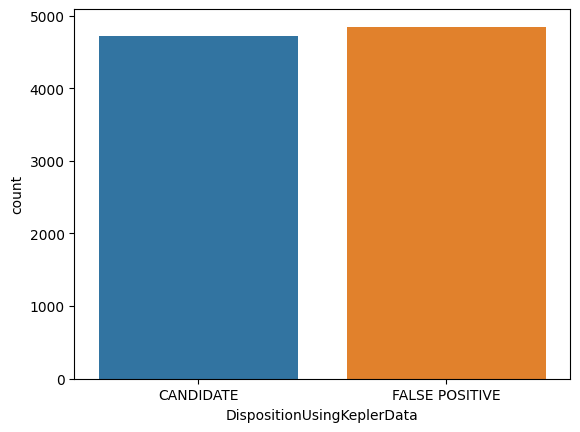

In [345]:
import seaborn as sns
sns.countplot(x = exoplanet_df['DispositionUsingKeplerData'])
print(exoplanet_df['DispositionUsingKeplerData'].value_counts())

ExoplanetArchiveDisposition
FALSE POSITIVE    4839
CONFIRMED         2671
CANDIDATE         2054
Name: count, dtype: int64


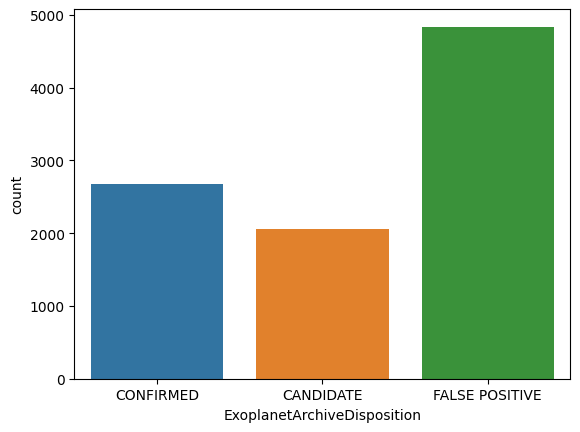

In [346]:
sns.countplot(x= exoplanet_df['ExoplanetArchiveDisposition'])
print(exoplanet_df['ExoplanetArchiveDisposition'].value_counts())

#### Tasks

-  Explore missing values by finding the the precentage of missing values for each column - print as a dataframe
-  Visualise the missing values of the columns with the 5 most percentage of missing value
-  Identify potential outliers of the numeric features. This can be done in many ways but you should probably try to write some kind of script/loop that will iterate through the features and calculate the number of values outside [Q1 - 1.5IQR ; Q3 + 1.5IQR]. Don't remove them just yet but discuss what could be a good approach.
-  Determine what to do with potential outlier: keep, replace or remove

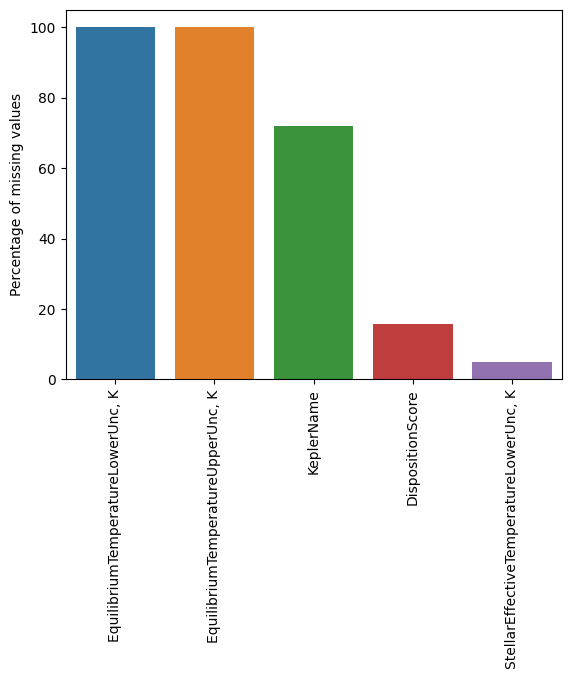

In [347]:
#find percentege of missing values for each column, print as dataframe
missing_values = exoplanet_df.isnull().sum().sort_values(ascending=False)
percentage_missing_values = ((missing_values/len(exoplanet_df))*100).round(2)
percentage_missing_values = percentage_missing_values.to_frame()
percentage_missing_values.columns = ['Percentage of missing values']
percentage_missing_values

#visualize 5 columns with most missing values
from matplotlib import pyplot as plt
sns.barplot(x=percentage_missing_values.index[0:5], y='Percentage of missing values', data=percentage_missing_values[0:5])
plt.xticks(rotation=90)
plt.show()


In [348]:
#identify potential outliers of numerical columns
numerical_columns = exoplanet_df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop(['KepID'])

#iterate through numerical columns and calculate number of values Q1-1.5*IQR and Q3+1.5*IQR
for column in numerical_columns:
    q1 = exoplanet_df[column].quantile(0.25)
    q3 = exoplanet_df[column].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    print(column, ":", exoplanet_df[(exoplanet_df[column]<lower_limit) | (exoplanet_df[column]>upper_limit)][column].count())

DispositionScore : 0
NotTransit-LikeFalsePositiveFlag : 1531
koi_fpflag_ss : 2226
CentroidOffsetFalsePositiveFlag : 1889
EphemerisMatchIndicatesContaminationFalsePositiveFlag : 1148
OrbitalPeriod, days : 1567
OrbitalPeriodUpperUnc, days : 1650
OrbitalPeriodLowerUnc, days : 1650
TransitEpoch, BKJD : 1046
TransitEpochUpperUnc, BKJD : 838
TransitEpochLowerUnc, BKJD : 838
ImpactParamete : 82
ImpactParameterUpperUnc : 736
ImpactParameterLowerUnc : 120
TransitDuration, hrs : 869
TransitDurationUpperUnc, hrs : 930
TransitDurationLowerUnc, hrs : 930
TransitDepth, ppm : 1798
TransitDepthUpperUnc, ppm : 1084
TransitDepthLowerUnc, ppm : 1084
PlanetaryRadius, Earthradii : 1469
PlanetaryRadiusUpperUnc, Earthradii : 1716
PlanetaryRadiusLowerUnc, Earthradii : 1390
EquilibriumTemperature, K : 411
EquilibriumTemperatureUpperUnc, K : 0
EquilibriumTemperatureLowerUnc, K : 0
InsolationFlux, Earthflux : 1438
InsolationFluxUpperUnc, Earthflux : 1536
InsolationFluxLowerUnc, Earthflux : 1483
TransitSignal-to-

### 2. Feature Engineering

#### Tasks

-  Based only on the analysis above, you should be able to remove some columns (two of the columns will have 100% missing values). Remove these columns.
-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.) - there should be 4
-  Remove rows with missing values, NaNs, nulls and/or infinite values - if you want, you may choose to impute instead
-  If you you chose to remove or replace outliers do this now. If you chose to keep, move on
-  Create a correlation matrix and discuss (use only numeric columns, perhaps make an extra dataset just with numeric values) - drop appropriate columns
-  The values of `ExoplanetArchiveDisposition` and `ExoplanetArchiveDisposition` are categorical and if they are to act like labels, you should change them. Change them as follows: 'FALSE POSITIVE' values is assigned a numerical value of `0`, 'CANDIDATE' assigned `1`, and 'CONFIRMED' a `2`. Same assignment in both features. The easiest way is to create two new features, call them `KeplerDispositionStatus` and `ArchiveDispositionStatus`, and then drop the originalæ features. It will look something like this (the last couple of columns in the new dataframe):

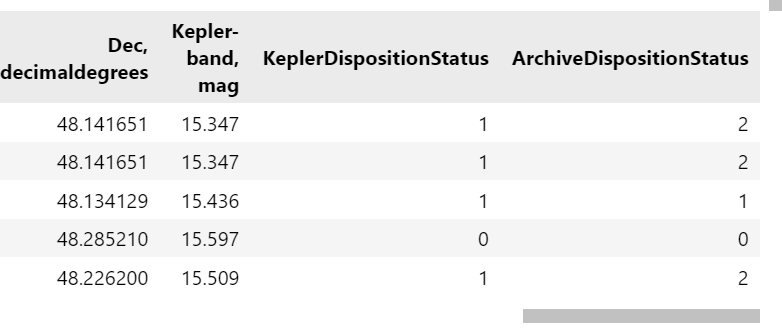

In [349]:
#drop columns with 100% missing values
exoplanet_df = exoplanet_df.drop(['EquilibriumTemperatureLowerUnc, K', 'EquilibriumTemperatureUpperUnc, K'], axis=1)
#remove irrelevant columns (names, ids, etc.)
exoplanet_df = exoplanet_df.drop(['KepID', 'KOIName', 'KeplerName', 'TCEPlanetNumber', 'TCEDeliver'], axis=1)
#remove NaN values
exoplanet_df = exoplanet_df.dropna()
#replace outliers with median
numerical_columns = exoplanet_df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    q1 = exoplanet_df[column].quantile(0.25)
    q3 = exoplanet_df[column].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1-1.5*iqr
    upper_limit = q3+1.5*iqr
    exoplanet_df[column] = exoplanet_df[column].mask((exoplanet_df[column]<lower_limit) | (exoplanet_df[column]>upper_limit), exoplanet_df[column].median())


In [350]:
#create columns based on 'DispositionUsingKeplerData' and 'ExoplanetArchiveDisposition' columns named 'KeplerDispositionStatus' and 'ArchiveDispositionStatus'
#if 'FALSE POSITIVE' then 0, else if 'Candidate' then 1, else if 'CONFIRMED' then 2
exoplanet_df['KeplerDispositionStatus'] = exoplanet_df['DispositionUsingKeplerData'].apply(lambda x: 0 if x == 'FALSE POSITIVE' else (1 if x == 'CANDIDATE' else 2))
exoplanet_df['ArchiveDispositionStatus'] = exoplanet_df['ExoplanetArchiveDisposition'].apply(lambda x: 0 if x == 'FALSE POSITIVE' else (1 if x == 'CANDIDATE' else 2))
#drop 'DispositionUsingKeplerData' and 'ExoplanetArchiveDisposition' columns
exoplanet_df = exoplanet_df.drop(['DispositionUsingKeplerData', 'ExoplanetArchiveDisposition'], axis=1)

#### Tasks continued
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant
-  Place `KeplerDispositionStatus` as the target and remove the following from the features: `DispositionScore`, `KeplerDispositionStatus`, `ArchiveDispositionStatus`
- Consider scaling your (numeric) data
- You should now have two datasets, one with cleaned features and one with the target labels (1 for Candidate and 0 otherwise)

In [351]:
#find correlation with 'KeplerDispositionStatus' (target) and sort values
correlation_with_target = exoplanet_df.corrwith(exoplanet_df['KeplerDispositionStatus']).sort_values(ascending=False)
print(correlation_with_target)

#store columns with correlation < x in a list for later dropping
x = 0.2
columns_to_drop = []
for i in range(len(correlation_with_target)):
    if abs(correlation_with_target.iloc[i]) < x:
        # print(correlation_with_target.index[i], correlation_with_target.iloc[i])
        columns_to_drop.append(correlation_with_target.index[i]) 

KeplerDispositionStatus                                  1.000000
ArchiveDispositionStatus                                 0.919833
DispositionScore                                         0.908955
StellarEffectiveTemperatureLowerUnc, K                   0.384091
PlanetaryRadiusLowerUnc, Earthradii                      0.300762
OrbitalPeriodUpperUnc, days                              0.255102
StellarSurfaceGravityLowerUnc, log10(cm/s^2)             0.252621
OrbitalPeriod, days                                      0.222041
InsolationFluxLowerUnc, Earthflux                        0.201675
TransitEpoch, BKJD                                       0.187761
TransitEpochUpperUnc, BKJD                               0.155981
TransitDurationUpperUnc, hrs                             0.124705
ImpactParameterUpperUnc                                  0.115586
Dec, decimaldegrees                                      0.092639
StellarSurfaceGravity, log10(cm/s^2)                     0.070068
StellarRad

In [352]:
#drop columns with correlation < x
# exoplanet_df = exoplanet_df.drop(columns_to_drop, axis=1)

In [353]:
#place 'KeplerDispositionStatus' as target column and remove 'DispositionScore', 'KeplerDispositionStatus' and 'ArchiveDispositionStatus' columns
target_column = exoplanet_df['KeplerDispositionStatus']
model_df = exoplanet_df.drop(['DispositionScore', 'KeplerDispositionStatus', 'ArchiveDispositionStatus'], axis=1)

#drop 'StellarEffectiveTemperatureUpperUnc, K' and 'StellarEffectiveTemperatureLowerUnc, K', 'StellarRadiusUpperUnc, Solarradii' and 'StellarSurfaceGravityLowerUnc, log10(cm/s^2)' columns
# model_df = model_df.drop(['StellarEffectiveTemperatureUpperUnc, K'], axis=1) #causing error -must be removed
# model_df = model_df.drop(['StellarEffectiveTemperatureLowerUnc, K'], axis=1) #causing error -must be removed 
# model_df = model_df.drop(['StellarSurfaceGravityLowerUnc, log10(cm/s^2)'], axis=1) #causing error -must be removed
# model_df = model_df.drop(['StellarRadiusUpperUnc, Solarradii'], axis=1) #causing error -must be removed

In [354]:
numerical_columns = model_df.select_dtypes(include=['int64', 'float64']).columns
#create a correlation matrix of numerical columns
correlation_matrix = model_df[numerical_columns].corr().round(2)

#print columns with correlation > x and store them in a list for later dropping
x = 0.75
columns_to_drop = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > x:
            print(correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            columns_to_drop.append(correlation_matrix.columns[i])

OrbitalPeriodLowerUnc, days OrbitalPeriodUpperUnc, days -1.0
TransitEpochLowerUnc, BKJD TransitEpochUpperUnc, BKJD -1.0
TransitDurationUpperUnc, hrs TransitEpochUpperUnc, BKJD 0.76
TransitDurationUpperUnc, hrs TransitEpochLowerUnc, BKJD -0.76
TransitDurationLowerUnc, hrs TransitEpochUpperUnc, BKJD -0.76
TransitDurationLowerUnc, hrs TransitEpochLowerUnc, BKJD 0.76
TransitDurationLowerUnc, hrs TransitDurationUpperUnc, hrs -1.0
TransitDepthLowerUnc, ppm TransitDepthUpperUnc, ppm -1.0
InsolationFluxLowerUnc, Earthflux InsolationFlux, Earthflux -0.76
StellarEffectiveTemperatureLowerUnc, K StellarEffectiveTemperatureUpperUnc, K -0.85
StellarRadius, Solarradii StellarSurfaceGravity, log10(cm/s^2) -0.81


In [355]:
#drop columns with correlation > x
model_df = model_df.drop(columns_to_drop, axis=1)

In [356]:
#get min & max values and skewness of numerical columns and print as dataframe
from scipy.stats import skew
numerical_columns = model_df.select_dtypes(include=['int64', 'float64']).columns
min_values = model_df[numerical_columns].min()
max_values = model_df[numerical_columns].max()
skewness = model_df[numerical_columns].skew()
skewness = skewness.round(2)
skewness = skewness.to_frame()
skewness.columns = ['Skewness']

val_range = min_values.to_frame()
val_range.columns = ['Min']
val_range['Max'] = max_values

In [357]:
#get positive and negative skewness columns
positive_skewness = skewness[skewness['Skewness']>0].index
negative_skewness = skewness[skewness['Skewness']<0].index

In [358]:
#get positive & negative value columns
positive_columns = min_values[min_values>0].index
negative_columns = max_values[max_values<0].index

In [359]:
#transformation
#...

In [360]:
#scaling
#scale data by dividing by L2 norm
# from sklearn.preprocessing import Normalizer
# normalizer = Normalizer()
# model_df = normalizer.fit_transform(model_df)

#scale data by dividing by Standard Deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model_df = scaler.fit_transform(model_df)

### 3+4. Train, Test, Validation, Cross Validation + Models
-  Consider which method to use to split the data and do the appropriate splits - if using CV still make a test set
-  Use claasification algorithms to train a model - which and how many is up to you

In [361]:
#split data into train, test and validation sets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

X_trainVal, X_test, y_trainVal, y_test = train_test_split(model_df, target_column, stratify=target_column, test_size=0.25, random_state=69)
X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, test_size=0.25, random_state=69)

In [362]:
best_score = 0
for num_neighbors in range(1,15):
    # Learn the model with a certain numnber of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(X_train, y_train)
    
    # Evaluate the model
    score = knn.score(X_val, y_val)
    
    # If improvement, store score and parameter
    if score>best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainVal, y_trainVal)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best score on validation set: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_trainVal, y_trainVal)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Best number of neighbors found: 6
Best score on validation set: 0.8701298701298701
Score on training/validation set: 0.9025974025974026
Score on test set: 0.8708354689902614


In [363]:
#selecting hyperparameters using cross-validation
best_num_neighbors = 0
best_score = 0
for num_neighbors in range(1,15):
    # Set a certain number of neighbors
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    
    # Perform cross validation
    scores = cross_val_score(knn, X_trainVal, y_trainVal, cv=5)
    
    # Compute the mean score
    score = scores.mean()
    print("Number of neighbors: {}, score: {}".format(num_neighbors, score))
    
    # If improvement, store score and parameter
    if score > best_score:
        best_score = score
        best_num_neighbors = num_neighbors

# Build a model on the combine training and valiation data
knn = KNeighborsClassifier(n_neighbors=best_num_neighbors)
knn.fit(X_trainVal, y_trainVal)

print("Best number of neighbors found: {}".format(best_num_neighbors))
print("Best average score: {}".format(best_score))
print("Score on training/validation set: {}".format(knn.score(X_trainVal, y_trainVal)))
print("Score on test set: {}".format(knn.score(X_test, y_test)))

Number of neighbors: 1, score: 0.8403953082689206
Number of neighbors: 2, score: 0.8426170925573147
Number of neighbors: 3, score: 0.8586821111330079
Number of neighbors: 4, score: 0.8590223857175181
Number of neighbors: 5, score: 0.8583397928572992
Number of neighbors: 6, score: 0.860732225360748
Number of neighbors: 7, score: 0.8590264730999145
Number of neighbors: 8, score: 0.8617594721437591
Number of neighbors: 9, score: 0.8540719817235616
Number of neighbors: 10, score: 0.8574878655835103
Number of neighbors: 11, score: 0.8537299554037385
Number of neighbors: 12, score: 0.8583422744823258
Number of neighbors: 13, score: 0.852361412190618
Number of neighbors: 14, score: 0.856462370535812
Best number of neighbors found: 8
Best average score: 0.8617594721437591
Score on training/validation set: 0.8926862611073137
Score on test set: 0.875961045617632


### 5. Evaluate
-  Write three functions:
     1. One that calculates accuracy, precision, recall, specificity, and f1-score
     2. One that outputs the confusion matrix
     3. One that diplays the precision-recall curve as well as the ROC-cruve
-  Use your newly written functions to evaluate your models using the test data created in (3+4)

In [364]:
#calculate accuracy, precision, recall and f1-score
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       935
           1       0.85      0.92      0.89      1016

    accuracy                           0.88      1951
   macro avg       0.88      0.87      0.88      1951
weighted avg       0.88      0.88      0.88      1951



Text(0.5, 1.0, 'Confusion Matrix')

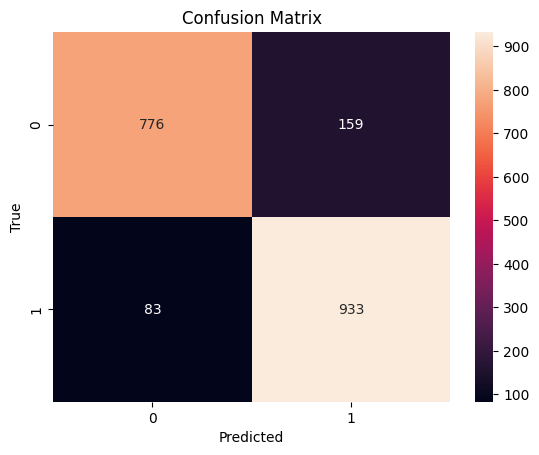

In [365]:
#visualize confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

#visualize confusion matrix as heatmap
heatmap = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
heatmap.set_xlabel('Predicted')
heatmap.set_ylabel('True')
heatmap.set_title('Confusion Matrix')

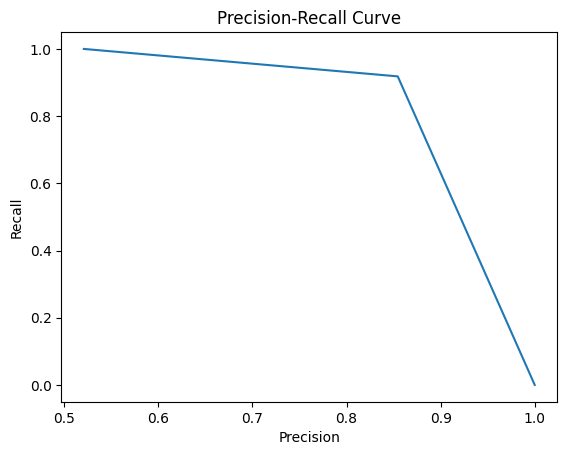

In [366]:
#display precision-recall curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(precision, recall)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve')
plt.show()

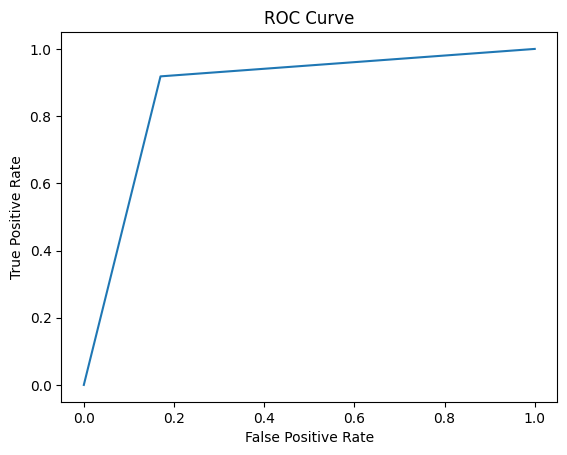

In [367]:
#display ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


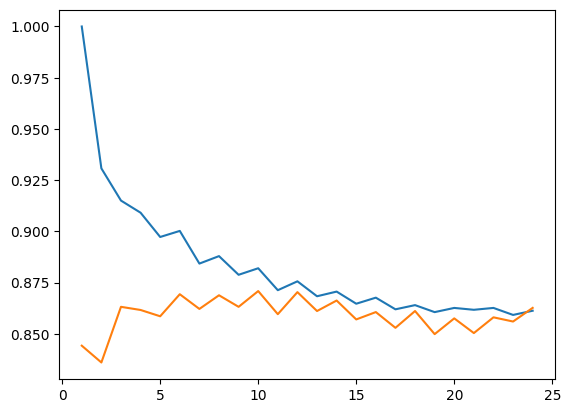

In [368]:
train_accuracy = []
test_accuracy = []
neighoursRange = range(1,25)
for i in neighoursRange:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighoursRange, train_accuracy, label='train')
plt.plot(neighoursRange, test_accuracy, label='test')

In [369]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Accuracy on training set: {}".format(gnb.score(X_train, y_train)))
print("Accuracy on test set: {}".format(gnb.score(X_test, y_test)))

Accuracy on training set: 0.8133971291866029
Accuracy on test set: 0.814454126089185


In [370]:
#linear regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)
print("Accuracy on training set: {}".format(linreg.score(X_train, y_train)))
print("Accuracy on test set: {}".format(linreg.score(X_test, y_test)))

Accuracy on training set: 0.5377051954502067
Accuracy on test set: 0.5382442581682374


Best depth: 5
Best score: 0.8796992481203008


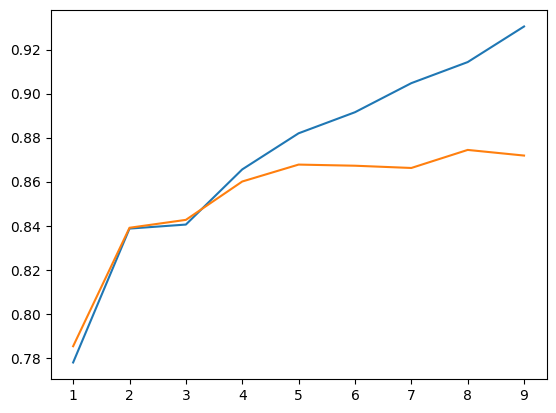

In [375]:
#find best depth for decision tree and plot accuracy
from sklearn.tree import DecisionTreeClassifier
best_score = 0
best_depth = 0
train_accuracy = []
test_accuracy = []
depthRange = range(1,10)
for max_depth in range(1,10):
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X_train, y_train)
    score = tree.score(X_val, y_val)
    
    train_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))

    if score > best_score:
        best_score = score
        best_depth = max_depth

plt.plot(depthRange, train_accuracy, label='train')
plt.plot(depthRange, test_accuracy, label='test')

print("Best depth: {}".format(best_depth))
print("Best score: {}".format(best_score))